In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('train images    :',mnist.train.images.shape,
     'labels:',mnist.train.labels.shape)
print('validation images    :',mnist.validation.images.shape,
     'labels:',mnist.validation.labels.shape)
print('test images    :',mnist.test.images.shape,
     'labels:',mnist.test.labels.shape)

('train images    :', (55000, 784), 'labels:', (55000, 10))
('validation images    :', (5000, 784), 'labels:', (5000, 10))
('test images    :', (10000, 784), 'labels:', (10000, 10))


In [4]:
#建立layer函数
def layer(output_dim, input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs =activation(XWb)
        
    return outputs

## 建立模型

In [6]:
#建立输入层
x = tf.placeholder('float', [None, 784])

In [7]:
#建立隐藏层(h1)
h1 = layer(output_dim=256,input_dim=784,inputs=x, activation=tf.nn.relu)

In [8]:
#建立输出层
y_predict = layer(output_dim=10, input_dim=256, inputs=h1, activation=None)

## 定义训练方式

keras和tensorflow定义训练方式的不同

- keras定义训练方式:只需要使用model.compile设置损失函数,优化器,并使用metrics设置评估模型的方式
- tensorflow定义训练方式:必须自定定义损失函数的公式,优化器和设置参数,并定义评估模型准确率的公式

In [9]:
y_label = tf.placeholder('float', [None,10])

In [10]:
#定义损失函数
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

In [11]:
#定义优化器
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

## 定义评估模型准确率的方式

In [10]:
correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
#计算预测正确结果的平均值,tf.cast数值类型转换成float型
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

## 进行训练

两者区别:
- keras进行训练:只需要使用model.fit就可以开始训练
- TensorFlow进行训练:必须编写程序代码来控制训练的每一个过程

In [14]:
trainEpochs = 15
batchSize = 100
loss_list = []
epoch_list = []
accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
#每轮迭代都要计算loss,同时评估模型
totalBatch = 550
for epoch in range(trainEpochs):
    for i in range(totalBatch):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
        
    loss,acc = sess.run([loss_function, accuracy],feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), " Accuracy=", acc)

('Train Epoch:', '01', 'Loss=', '6.457884312', ' Accuracy=', 0.84060001)
('Train Epoch:', '02', 'Loss=', '4.205471992', ' Accuracy=', 0.88459998)
('Train Epoch:', '03', 'Loss=', '3.197957039', ' Accuracy=', 0.90560001)
('Train Epoch:', '04', 'Loss=', '2.711728573', ' Accuracy=', 0.91299999)
('Train Epoch:', '05', 'Loss=', '2.376116514', ' Accuracy=', 0.91799998)
('Train Epoch:', '06', 'Loss=', '2.100419760', ' Accuracy=', 0.92079997)
('Train Epoch:', '07', 'Loss=', '1.922395110', ' Accuracy=', 0.92640001)
('Train Epoch:', '08', 'Loss=', '1.759475946', ' Accuracy=', 0.93159997)
('Train Epoch:', '09', 'Loss=', '1.601080537', ' Accuracy=', 0.93360001)
('Train Epoch:', '10', 'Loss=', '1.484995365', ' Accuracy=', 0.93580002)
('Train Epoch:', '11', 'Loss=', '1.412561893', ' Accuracy=', 0.93760002)
('Train Epoch:', '12', 'Loss=', '1.374233365', ' Accuracy=', 0.9386)
('Train Epoch:', '13', 'Loss=', '1.318613529', ' Accuracy=', 0.94300002)
('Train Epoch:', '14', 'Loss=', '1.338333964', ' Accura

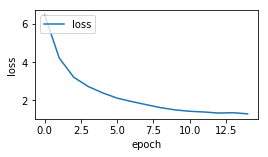

In [20]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

## 评估模型准确率

In [21]:
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images,
                                                y_label: mnist.test.labels}))

('Accuracy:', 0.94319999)


## 进行预测

In [22]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x:mnist.test.images})

In [23]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [24]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[idx], (28,28)), cmap='binary')
        title = 'label='+str(np.argmax(labels[idx]))
        
        if len(prediction)>0:
            title +=", predict="+str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

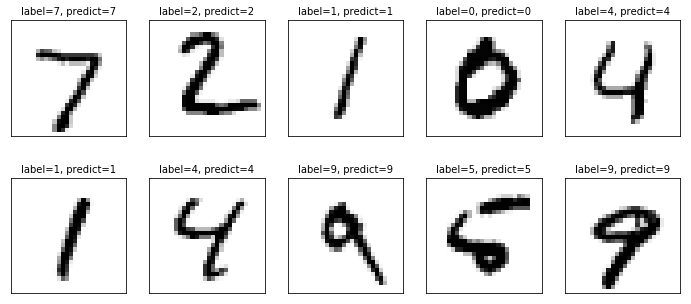

In [27]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

## 隐藏层加入更多的神经元用于提高准确率

In [11]:
sess.close()

In [12]:
x = tf.placeholder('float',[None, 784])
#建立隐藏层h1
h1 = layer(output_dim=1000, input_dim=784,inputs=x, activation=tf.nn.relu)
#建立输出层
y_predict=layer(output_dim=10, input_dim=1000, inputs=h1, activation=None)
y_label = tf.placeholder('float', [None, 10])

In [13]:
correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
#计算预测正确结果的平均值,tf.cast数值类型转换成float型
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [14]:
#定义损失函数
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
#定义优化器
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [15]:
trainEpochs = 15
batchSize = 100
loss_list = []
epoch_list = []
accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
#每轮迭代都要计算loss,同时评估模型
totalBatch = 550
for epoch in range(trainEpochs):
    for i in range(totalBatch):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
        
    loss,acc = sess.run([loss_function, accuracy],feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), " Accuracy=", acc)

('Train Epoch:', '01', 'Loss=', '8.676305771', ' Accuracy=', 0.89499998)
('Train Epoch:', '02', 'Loss=', '5.626771927', ' Accuracy=', 0.92220002)
('Train Epoch:', '03', 'Loss=', '4.302570343', ' Accuracy=', 0.93400002)
('Train Epoch:', '04', 'Loss=', '3.688324690', ' Accuracy=', 0.93760002)
('Train Epoch:', '05', 'Loss=', '3.516411781', ' Accuracy=', 0.94059998)
('Train Epoch:', '06', 'Loss=', '2.987801075', ' Accuracy=', 0.94800001)
('Train Epoch:', '07', 'Loss=', '2.835555077', ' Accuracy=', 0.94760001)
('Train Epoch:', '08', 'Loss=', '2.704016924', ' Accuracy=', 0.95179999)
('Train Epoch:', '09', 'Loss=', '2.709092617', ' Accuracy=', 0.95240003)
('Train Epoch:', '10', 'Loss=', '2.521335840', ' Accuracy=', 0.95459998)
('Train Epoch:', '11', 'Loss=', '2.525215387', ' Accuracy=', 0.95560002)
('Train Epoch:', '12', 'Loss=', '2.747397661', ' Accuracy=', 0.95200002)
('Train Epoch:', '13', 'Loss=', '2.466738701', ' Accuracy=', 0.95599997)
('Train Epoch:', '14', 'Loss=', '2.392931700', ' Ac

In [17]:
print('Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

('Accuracy:', 0.95370001)


## 建立包含两个隐藏层的多层感知器模型

In [21]:
sess.close()

In [7]:
x = tf.placeholder('float', [None, 784])
h1 = layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)
h2 = layer(output_dim=1000,input_dim=1000,inputs=h1,activation=tf.nn.relu)
y_predict =layer(output_dim=10,input_dim=1000,inputs=h2,activation=None)
y_label = tf.placeholder('float', [None, 10])

In [8]:
correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
#计算预测正确结果的平均值,tf.cast数值类型转换成float型
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [9]:
#定义损失函数
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
#定义优化器
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)
trainEpochs = 15
batchSize = 100
loss_list = []
epoch_list = []
accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#每轮迭代都要计算loss,同时评估模型
totalBatch = 550
for epoch in range(trainEpochs):
    for i in range(totalBatch):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
        
    loss,acc = sess.run([loss_function, accuracy],feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), " Accuracy=", acc)

('Train Epoch:', '01', 'Loss=', '130.422439575', ' Accuracy=', 0.92040002)
('Train Epoch:', '02', 'Loss=', '91.544097900', ' Accuracy=', 0.93540001)
('Train Epoch:', '03', 'Loss=', '79.427078247', ' Accuracy=', 0.94279999)
('Train Epoch:', '04', 'Loss=', '71.194335938', ' Accuracy=', 0.949)
('Train Epoch:', '05', 'Loss=', '70.531250000', ' Accuracy=', 0.94980001)
('Train Epoch:', '06', 'Loss=', '59.210201263', ' Accuracy=', 0.95700002)
('Train Epoch:', '07', 'Loss=', '63.342487335', ' Accuracy=', 0.95380002)
('Train Epoch:', '08', 'Loss=', '65.286109924', ' Accuracy=', 0.95700002)
('Train Epoch:', '09', 'Loss=', '56.811687469', ' Accuracy=', 0.96179998)
('Train Epoch:', '10', 'Loss=', '61.891193390', ' Accuracy=', 0.96179998)
('Train Epoch:', '11', 'Loss=', '54.254238129', ' Accuracy=', 0.96579999)
('Train Epoch:', '12', 'Loss=', '59.694137573', ' Accuracy=', 0.96139997)
('Train Epoch:', '13', 'Loss=', '66.107955933', ' Accuracy=', 0.96060002)
('Train Epoch:', '14', 'Loss=', '59.132423

In [10]:
print('Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

('Accuracy:', 0.96270001)
